### Time Series Anylysis

In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [553]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [554]:
#import data

In [555]:
train_raw = pd.read_csv('../data/Train_SU63ISt.csv')
test_raw = pd.read_csv('../data/Test_0qrQsBZ.csv')

In [556]:
train_raw.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [557]:
def preprocess_dataset(dataset):
    
    dataset = dataset.drop('ID', axis=1)
    dataset['Datetime'] = pd.to_datetime(dataset['Datetime'],format='%d-%m-%Y %H:%M')

    dataset['year'] = dataset.Datetime.dt.year 
    dataset['month'] = dataset.Datetime.dt.month 
    dataset['day'] = dataset.Datetime.dt.day
    dataset['Hour'] = dataset.Datetime.dt.hour 

    dataset['day_of_week'] = dataset['Datetime'].dt.dayofweek
    dataset['is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >=5 else 0)
    
    dataset.set_index('Datetime', inplace=True)
    
    return dataset

In [560]:
train = preprocess_dataset(train_raw)

In [482]:
#train = train['2012-08-25':'2014-09-25']

In [564]:
test = preprocess_dataset(test_raw)

In [566]:
test.index.max()

Timestamp('2015-04-26 23:00:00')

In [488]:
#test = test['2014-09-26':'2014-12-31']

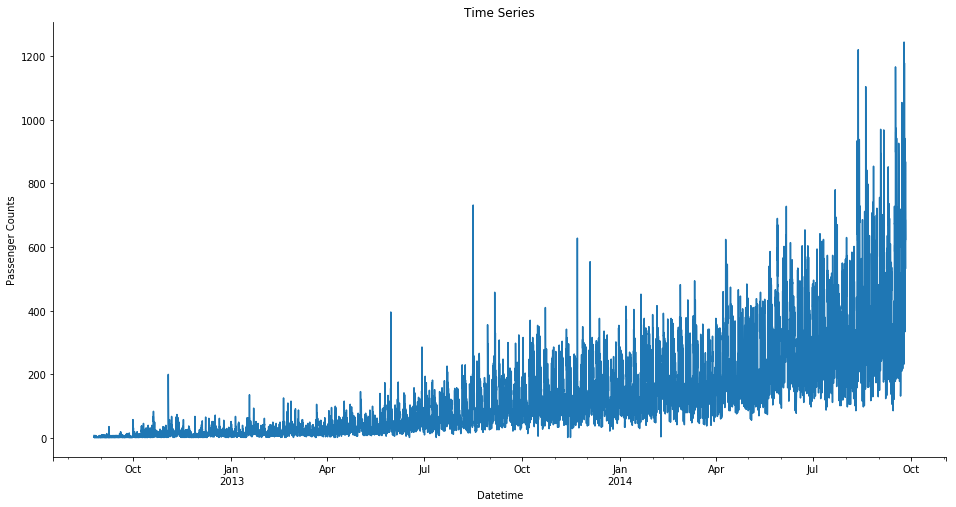

In [567]:
fig, ax = plt.subplots(figsize=(16,8))

ax = train['Count'].plot(title='Time Series')

ax.set_xlabel('Datetime')
ax.set_ylabel('Passenger Counts')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### EDA

Some hypothesis to verify:

- Traffic will increase as the years pass by
- Traffic will be high from May to October
- Traffic on weekdays will be more
- Traffic during the peak hours will be high

In [568]:
agg_years = train.groupby('year')['Count'].mean()

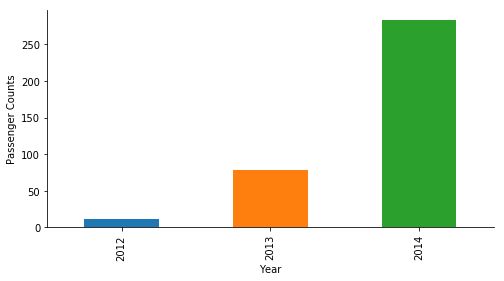

In [569]:
fig, ax = plt.subplots(figsize=(8,4))

ax = agg_years.plot(kind='bar')

ax.set_xlabel('Year')
ax.set_ylabel('Passenger Counts')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [570]:
agg_months = train.groupby('month')['Count'].mean()

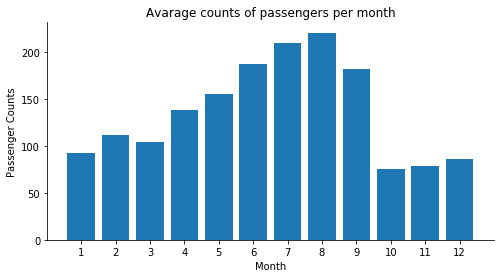

In [571]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x = agg_months.index, height=agg_months)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_months.index)

ax.set_title('Avarage counts of passengers per month')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [572]:
agg_months_year = train.groupby(by=['year','month'])['Count'].mean()

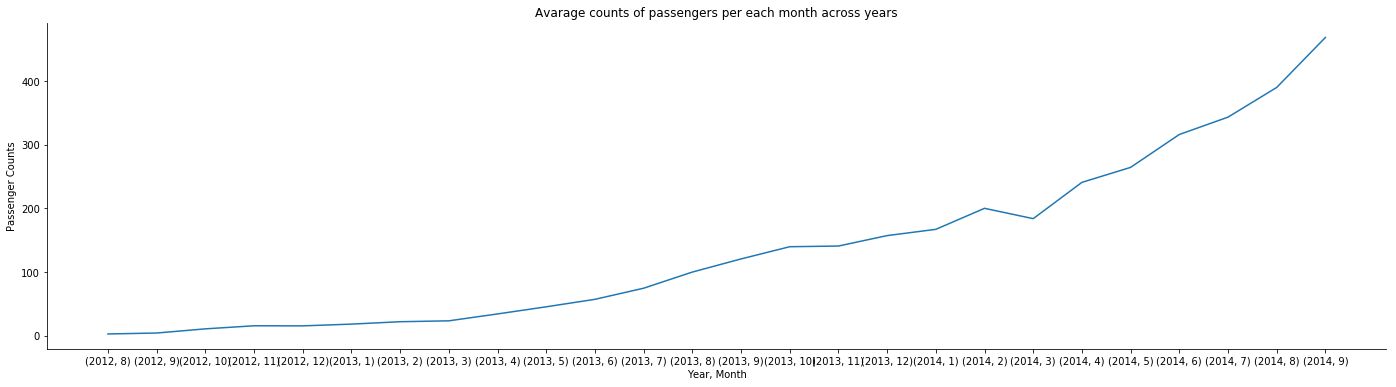

In [573]:
fig, ax = plt.subplots(figsize=(24,6))

ax = agg_months_year.plot(xticks=list(agg_months_year.reset_index().index))

ax.set_xlabel('Year, Month')
ax.set_ylabel('Passenger Counts')

ax.set_title('Avarage counts of passengers per each month across years')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [574]:
agg_days = train.groupby('day')['Count'].mean()

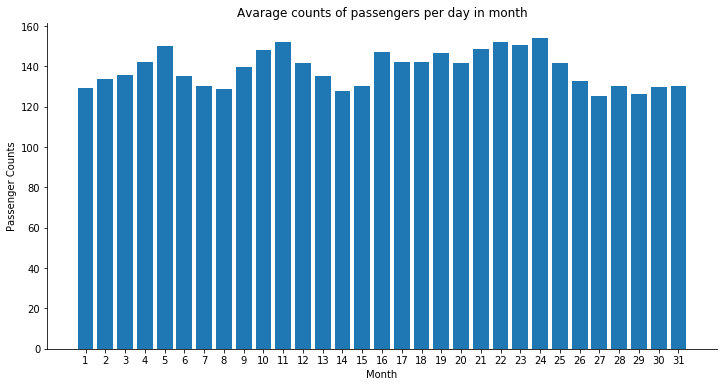

In [575]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x = agg_days.index, height=agg_days)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_days.index)

ax.set_title('Avarage counts of passengers per day in month')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [576]:
agg_hours = train.groupby('Hour')['Count'].mean()

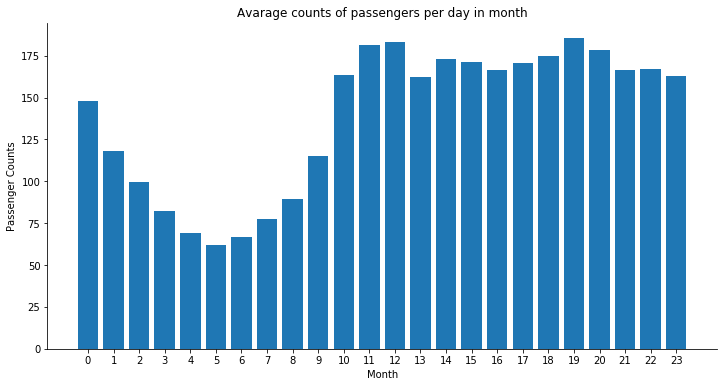

In [577]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x = agg_hours.index, height=agg_hours)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_hours.index)

ax.set_title('Avarage counts of passengers per day in month')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [578]:
agg_dayofweek = train.groupby('day_of_week')['Count'].mean()

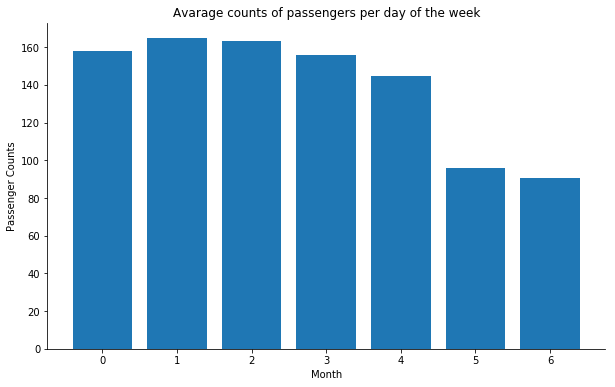

In [579]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x = agg_dayofweek.index, height=agg_dayofweek)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_dayofweek.index)

ax.set_title('Avarage counts of passengers per day of the week')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

There is a lot of noise in the hourly time series, I will aggregate the hourly time series to daily, weekly and monthly time series 

to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [580]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

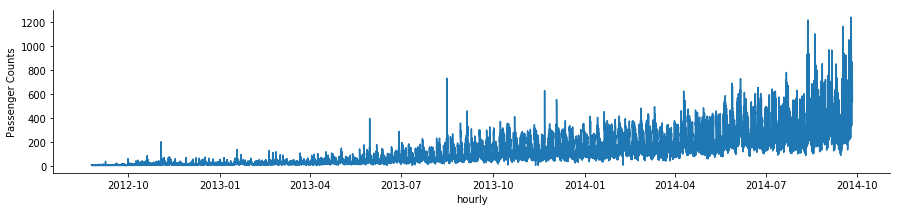

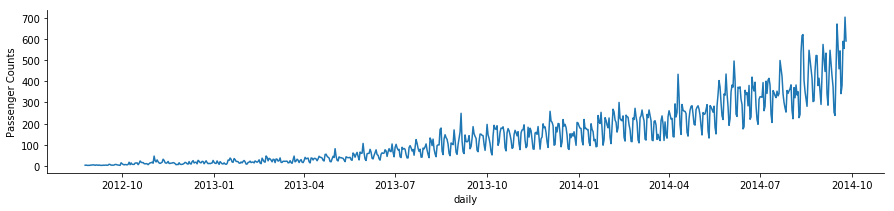

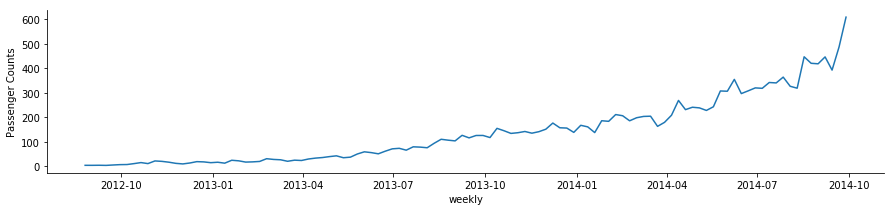

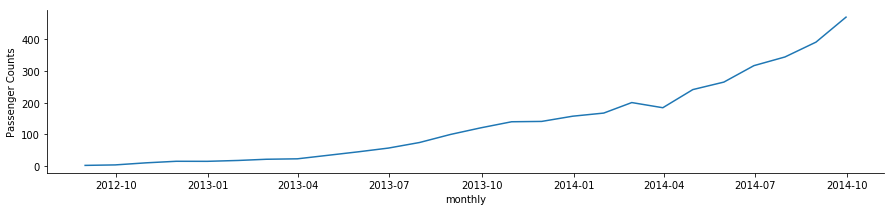

In [581]:
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(hourly.Count)
ax.set_xlabel('hourly')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(daily.Count)
ax.set_xlabel('daily')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(weekly.Count)
ax.set_xlabel('weekly')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(monthly.Count)
ax.set_xlabel('monthly')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [582]:
train_D = train.resample('D').sum()

#### Time based validation 

In [583]:
dTrain=train_D['2012-08-25':'2014-06-24']
dValid=train_D['2014-06-25':'2014-09-25']

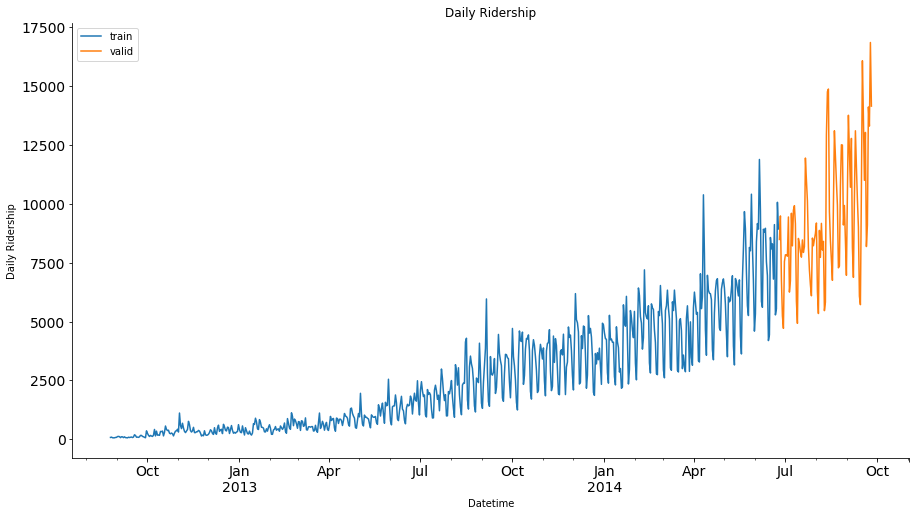

In [584]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
ax = dValid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')



ax.set_xlabel('Datetime')
ax.set_ylabel('Daily Ridership')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [675]:
# Moving average

In [632]:
dTrain_log = np.log(dTrain['Count'])
moving_avg = pd.rolling_mean(dTrain_log, 24)

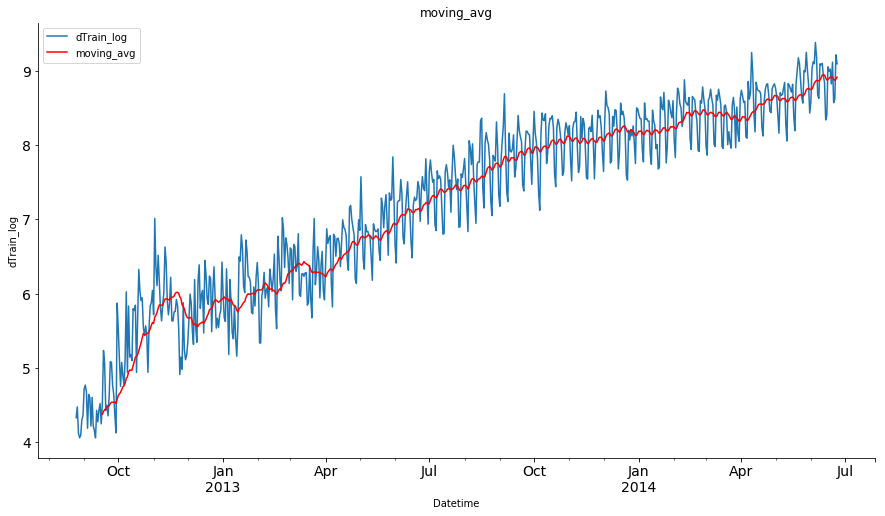

In [633]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain_log.plot(figsize=(15,8), title= 'dTrain_log', fontsize=14, label='dTrain_log')
ax = moving_avg.plot(figsize=(15,8), title= 'moving_avg', fontsize=14, label='moving_avg', c='r')



ax.set_xlabel('Datetime')
ax.set_ylabel('dTrain_log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [ ]:
# Forcasting with moving average

In [733]:
y_hat_avg = dValid.copy()
y_hat_avg['moving_avg_forecast'] = dTrain['Count'].rolling(50).mean().iloc[-1] # average of last 30 observations.

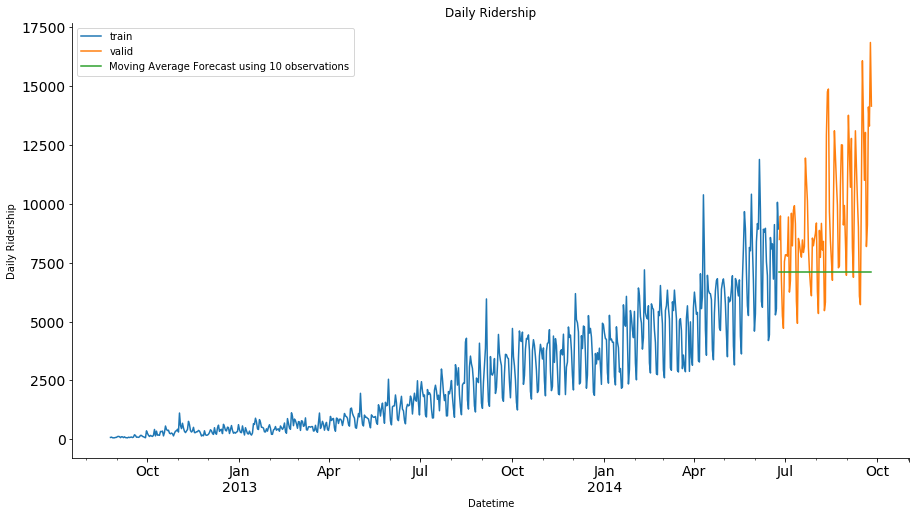

In [734]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
ax = dValid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
ax = y_hat_avg['moving_avg_forecast'].plot(figsize=(15,8), fontsize=14, label='Moving Average Forecast using 10 observations')

ax.set_xlabel('Datetime')
ax.set_ylabel('Daily Ridership')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [737]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [738]:
rmse = sqrt(mean_squared_error(dValid.Count, y_hat_avg.moving_avg_forecast))
print(rmse)

3460.60216319683


In [715]:
# Simple Exponential Smoothing

In [747]:
from statsmodels.tsa.api import SimpleExpSmoothing

ImportError: cannot import name 'SimpleExpSmoothing'

In [ ]:

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
ax = dValid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
ax = y_hat_avg['SES'].plot(figsize=(15,8), fontsize=14, label='SimpleExpSmoothing')

ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()



In [ ]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rmse)

In [634]:
### Removing Trend

In [635]:
dTrain_log_moving_avg_diff = dTrain_log - moving_avg

In [640]:
dTrain_log_moving_avg_diff.dropna(inplace = True)

In [637]:
from statsmodels.tsa.stattools import adfuller

In [650]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = pd.rolling_std(timeseries, window=24)
    
    #Plot rolling statistics:
    
    fig, ax = plt.subplots(figsize=(18,8))
    
    orig = ax.plot(timeseries, color='blue',label='Original')
    mean = ax.plot(rolmean, color='red', label='Rolling Mean')
    std = ax.plot(rolstd, color='black', label = 'Rolling Std')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

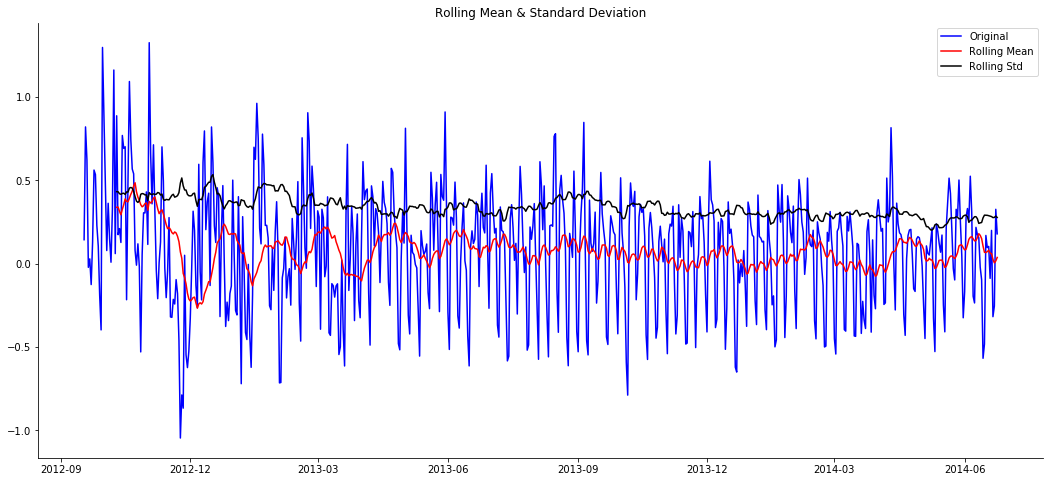

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [651]:
test_stationarity(dTrain_log_moving_avg_diff)

In [ ]:
# Stabilize the mean of the time series which is also a requirement for a stationary time series
# Differencing can help to make the series stable and eliminate the trend

In [648]:
dTrain_log_diff = dTrain_log - dTrain_log.shift(1)

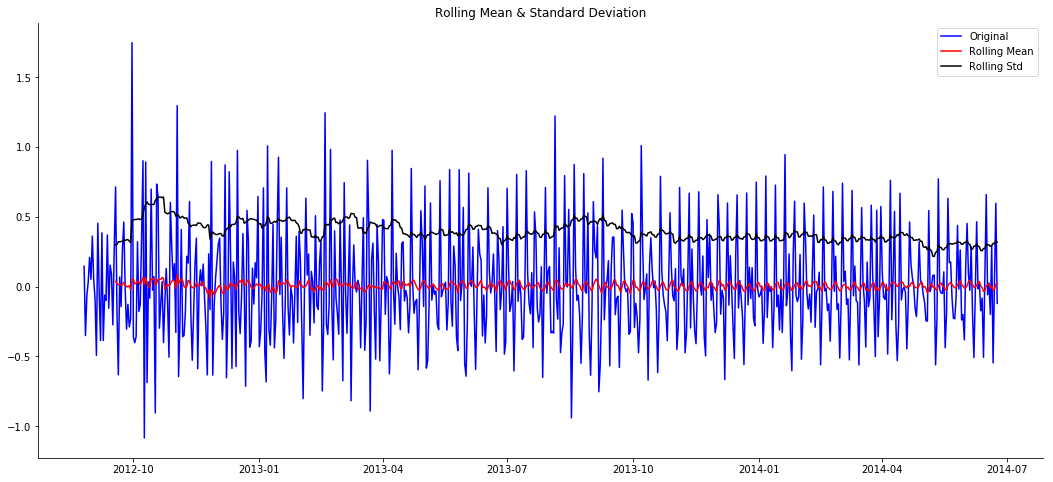

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [652]:
test_stationarity(dTrain_log_diff.dropna())

In [ ]:
### Removing Seasonality

I will use seasonal decompose to decompose the time series into trend, seasonality and residuals

In [654]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [660]:
decomposition = seasonal_decompose(pd.DataFrame(dTrain_log).Count.values, freq=24)

In [679]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

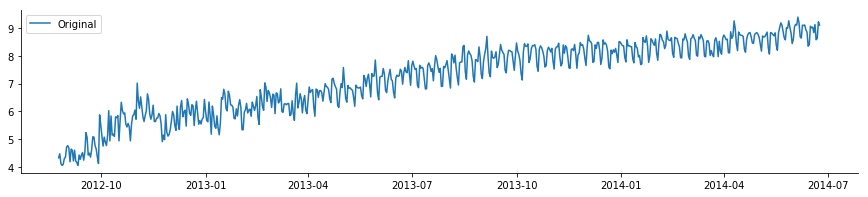

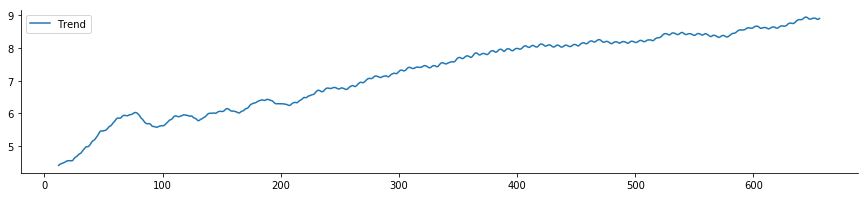

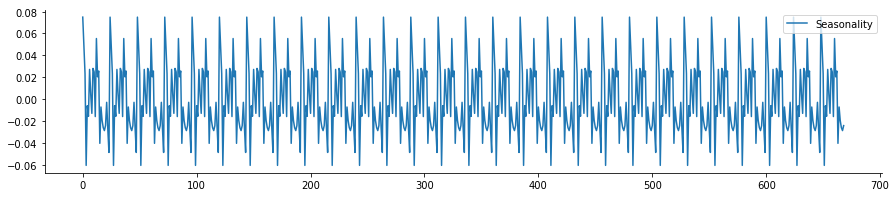

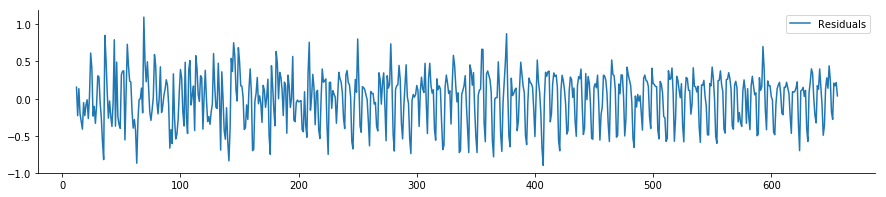

In [680]:
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(dTrain_log, label='Original')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(trend, label='Trend')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(seasonal, label='Seasonality')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(residual, label='Residuals')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [677]:
# Check stationarity of residuals.

In [688]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)

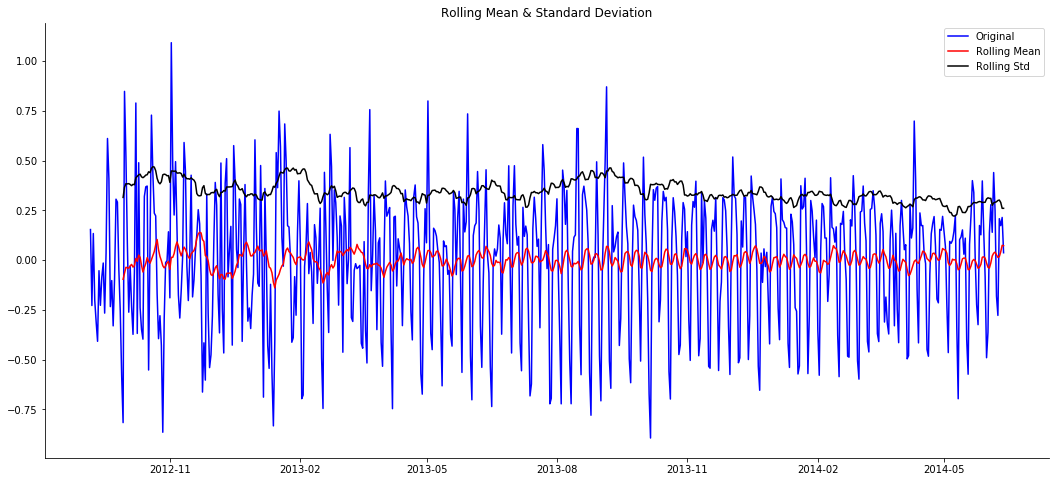

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [690]:
test_stationarity(train_log_decompose[0])

### Forecasting the time series using ARIMA